In [6]:
# write a function, that takes two strings to two different 3D nifti segmentation masks, reads them both, computes the difference of where the labels are different (binary). and plots the difference as a 3D Plot. 
# The function should return the difference as a 3D numpy array.

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def plot_diff(seg1, seg2, name = None, savepath='/home/linuxlia/Lia_Masterthesis/data/segmentation_diff/'):

    os.makedirs(savepath, exist_ok=True)

    # load the nifti files
    seg1 = nib.load(seg1)
    seg2 = nib.load(seg2)
    # get the data
    seg1_data = seg1.get_fdata()
    seg2_data = seg2.get_fdata()
    # get the shape
    shape = seg1_data.shape
    # create an empty array
    diff = np.zeros(shape)
    # find the difference
    diff[seg1_data != seg2_data] = 1
    # plot the difference
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(diff, edgecolor='k')
    plt.show()

    # save the difference as a nifti file
    diff_nifti = nib.Nifti1Image(diff, seg1.affine)
    if name is not None:
        nib.save(diff_nifti, os.path.join(savepath, name))
    else:
        nib.save(diff_nifti, os.path.join(savepath, 'diff.nii'))
    return diff
    

In [9]:
seg_FLAIR = '/home/linuxlia/Lia_Masterthesis/data/pazienti/015/015_ChP_mask_FLAIR_manual_seg.nii'
seg_T1xFLAIR = '/home/linuxlia/Lia_Masterthesis/data/pazienti/015/015_ChP_mask_T1xFLAIR_manual_seg.nii' 

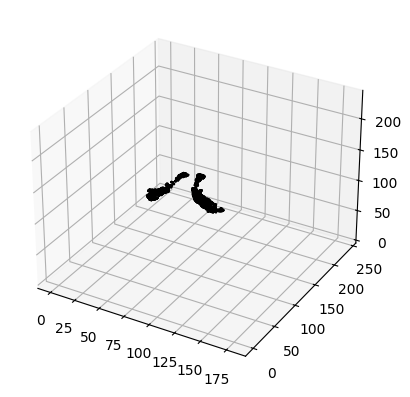

In [10]:
diff = plot_diff(seg_FLAIR, seg_T1xFLAIR, name='015_FLAIR_vs_T1xFLAIR_diff.nii')